In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score
from imblearn.pipeline import Pipeline
import joblib

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("indian_liver_patient - indian_liver_patient.csv")

In [4]:
df.shape

(583, 11)

In [5]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
df.drop_duplicates(inplace=True)
df.dropna(axis=1,how='all',inplace=True)

In [9]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)


In [11]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [12]:
df['Dataset'] = df['Dataset'].map({1:1, 2:0})
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [13]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


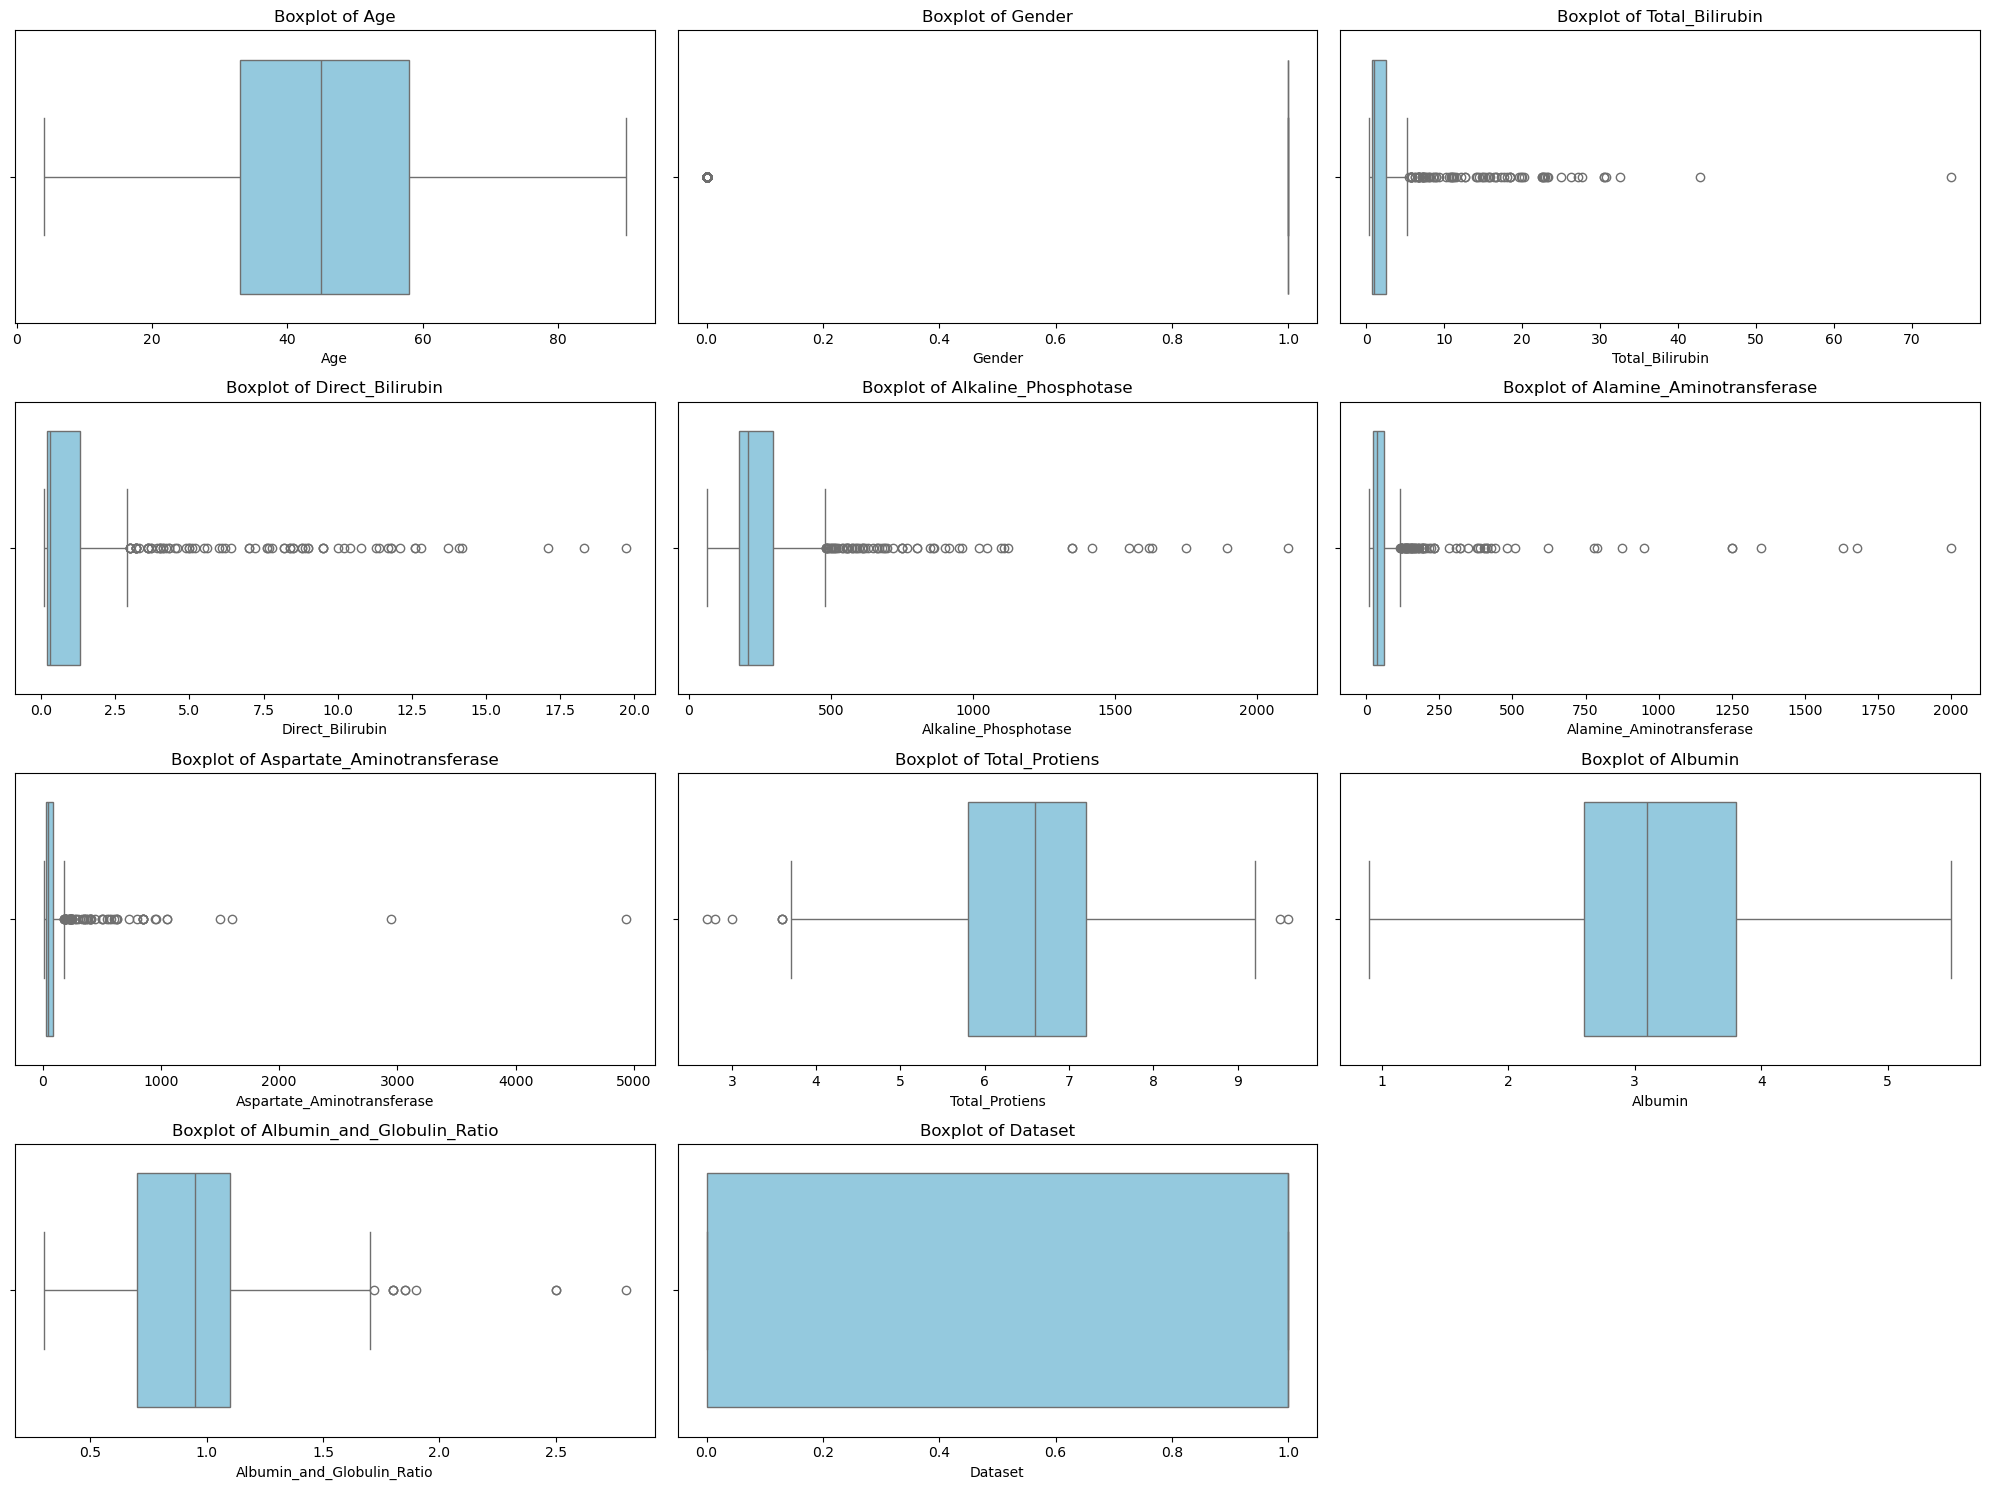

In [14]:
#Box plot
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 15))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [15]:
df['Dataset'].value_counts()

Dataset
1    406
0    164
Name: count, dtype: int64

In [16]:
df.corr()['Dataset'].sort_values(ascending=False)

Dataset                       1.000000
Direct_Bilirubin              0.250666
Total_Bilirubin               0.224430
Alkaline_Phosphotase          0.187560
Alamine_Aminotransferase      0.161917
Aspartate_Aminotransferase    0.151101
Age                           0.138093
Gender                        0.078501
Total_Protiens               -0.037794
Albumin                      -0.166835
Albumin_and_Globulin_Ratio   -0.170553
Name: Dataset, dtype: float64

In [17]:
df.drop(['Gender'],axis=1,inplace=True)

In [18]:
df.shape

(570, 10)

In [19]:
x = df.drop('Dataset', axis=1)  # all columns except target
y = df['Dataset']               # target column


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [21]:
#Balancing data
smote=SMOTE(random_state=42)
x_train_bal,y_train_bal=smote.fit_resample(x_train,y_train)
print("Before:",y_train.value_counts())
print("After:",y_train_bal.value_counts())

Before: Dataset
1    325
0    131
Name: count, dtype: int64
After: Dataset
1    325
0    325
Name: count, dtype: int64


In [22]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train_bal= scaler.fit_transform(x_train_bal)
x_test = scaler.transform(x_test)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
models = {
    'Logistic Regression':{
        'model':LogisticRegression(),
        'params':{}
    },
    'KNN':{
        'model':KNeighborsClassifier(),
        'params':{'n_neighbors':[3,5,9,11],'weights':['uniform','distance']}
    },

    'Decision Tree':{
        'model':DecisionTreeClassifier(),
        'params':{'max_depth':[1,2,3,4,5,6,7,8,9,10],
                  'criterion':['gini','entropy']}
    },
    
    'Random Forest':{
        'model':RandomForestClassifier(),
        'params':{'n_estimators':[10,20,30,40,50,60],
                  'criterion':['gini','entropy']}
    }
    }

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

results = []

for name , config in models.items():
  grid = GridSearchCV(config['model'],config['params'],cv=3,scoring='accuracy')
  grid.fit(x_train_bal,y_train_bal)



  y_hat = grid.predict(x_test)
  acc = accuracy_score(y_test,y_hat)
  f1 = f1_score(y_test,y_hat)
  recall = recall_score(y_test,y_hat)
  precision = precision_score(y_test,y_hat)

  results.append({
      'model':name,
      'best_params':grid.best_params_,
      'accuracy':acc,
      'f1_score':f1,
      'recall':recall,
      'precision':precision
  })

In [25]:
result_df  = pd.DataFrame(results).T
result_df

,0,1,2,3
model,Logistic Regression,KNN,Decision Tree,Random Forest
best_params,{},"{'n_neighbors': 3, 'weights': 'distance'}","{'criterion': 'gini', 'max_depth': 7}","{'criterion': 'gini', 'n_estimators': 40}"
accuracy,0.72807,0.692982,0.719298,0.701754
f1_score,0.780142,0.774194,0.783784,0.8
recall,0.679012,0.740741,0.716049,0.839506
precision,0.916667,0.810811,0.865672,0.764045


In [26]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators= 300,learning_rate= 0.05,
        max_depth= 4,
        min_child_weight= 3,
        gamma= 0.1,
        subsample= 0.8,
        colsample_bytree= 0.8,
        reg_alpha= 0.2,
        reg_lambda=1.0,
        scale_pos_weight= 1,   
        objective= "binary:logistic",
         eval_metric= "logloss"
)


xgb.fit(x_train_bal, y_train_bal)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [27]:
y_pred = xgb.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 0.7280701754385965
              precision    recall  f1-score   support

           0       0.56      0.30      0.39        33
           1       0.76      0.90      0.82        81

    accuracy                           0.73       114
   macro avg       0.66      0.60      0.61       114
weighted avg       0.70      0.73      0.70       114

[[10 23]
 [ 8 73]]


In [28]:
y_pred_proba = xgb.predict_proba(x_test)[:,1]

y_pred = (y_pred_proba >= 0.8).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.82      0.60        33
           1       0.89      0.63      0.74        81

    accuracy                           0.68       114
   macro avg       0.68      0.72      0.67       114
weighted avg       0.77      0.68      0.70       114

[[27  6]
 [30 51]]


In [29]:
lr = LogisticRegression(random_state=42,max_iter=200)
lr.fit(x_train_bal, y_train_bal)


LogisticRegression(max_iter=200, random_state=42)

In [30]:
y_pred = lr.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.7280701754385965
              precision    recall  f1-score   support

           0       0.52      0.85      0.64        33
           1       0.92      0.68      0.78        81

    accuracy                           0.73       114
   macro avg       0.72      0.76      0.71       114
weighted avg       0.80      0.73      0.74       114

[[28  5]
 [26 55]]


In [31]:
y_pred_proba = lr.predict_proba(x_test)[:,1]
y_pred = (y_pred_proba >= 0.51).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.88      0.66        33
           1       0.93      0.68      0.79        81

    accuracy                           0.74       114
   macro avg       0.73      0.78      0.72       114
weighted avg       0.81      0.74      0.75       114

[[29  4]
 [26 55]]


In [32]:
rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_split= 2,
    max_depth=5,
    class_weight='balanced_subsample',
    min_samples_leaf= 4,
    bootstrap=True,
    max_features='sqrt',
    random_state=42


)
rf.fit(x_train_bal, y_train_bal)


RandomForestClassifier(class_weight='balanced_subsample', max_depth=5,
                       min_samples_leaf=4, random_state=42)

In [33]:
y_pred = rf.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.7368421052631579
              precision    recall  f1-score   support

           0       0.53      0.76      0.62        33
           1       0.88      0.73      0.80        81

    accuracy                           0.74       114
   macro avg       0.71      0.74      0.71       114
weighted avg       0.78      0.74      0.75       114

[[25  8]
 [22 59]]


In [34]:
y_pred_proba = rf.predict_proba(x_test)[:,1]
y_pred = (y_pred_proba >= 0.58).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.82      0.63        33
           1       0.90      0.68      0.77        81

    accuracy                           0.72       114
   macro avg       0.71      0.75      0.70       114
weighted avg       0.79      0.72      0.73       114

[[27  6]
 [26 55]]


In [35]:
from sklearn.metrics import roc_curve , roc_auc_score
y_prob = lr.predict_proba(x_test)

fpr,tpr,thresholds = roc_curve(y_test,y_prob[:,1])
auc_score = roc_auc_score(y_test,y_prob[:,1])

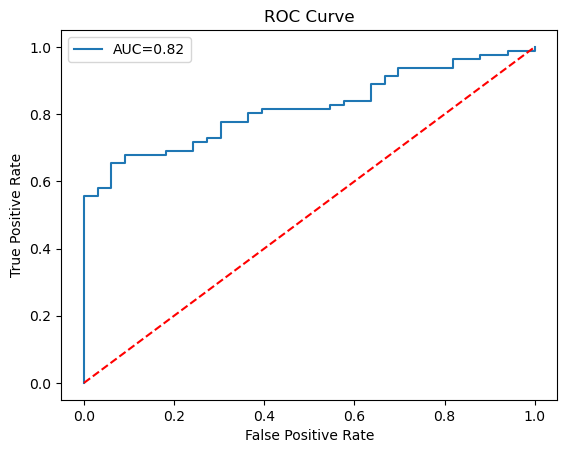

In [36]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr,label=f'AUC={auc_score:.2f}')
plt.plot([0,1],[0,1],linestyle='--',color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [42]:
pipeline = Pipeline([
    ("smote", SMOTE()),
    ("scaler", RobustScaler()),
    ("logistic", LogisticRegression(random_state=42,max_iter=200 ))
])
pipeline.fit(x_train,y_train)

Pipeline(steps=[('smote', SMOTE()), ('scaler', RobustScaler()),
                ('logistic',
                 LogisticRegression(max_iter=200, random_state=42))])

In [43]:
joblib.dump(pipeline, "liver_pipeline.pkl")

['liver_pipeline.pkl']